<a href="https://colab.research.google.com/github/Ayush-Singh2309/ML-AdvSupervised/blob/main/10-KaggleHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer as Imputer
from random import choices
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import BaseEstimator

In [ ]:
!gdown 1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9


Downloading...
From: https://drive.google.com/uc?id=1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9
To: /content/kaggle_houseprices_modified.csv
100% 459k/459k [00:00<00:00, 18.0MB/s]


In [ ]:
ds = pd.read_csv('/content/kaggle_houseprices_modified.csv')
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,198075.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,199650.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,212325.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,237500.0


In [ ]:
todrop = ['Id']


In [ ]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

In [ ]:
continuous = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']

In [ ]:
cat_to_con = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', ]


<Axes: ylabel='Frequency'>

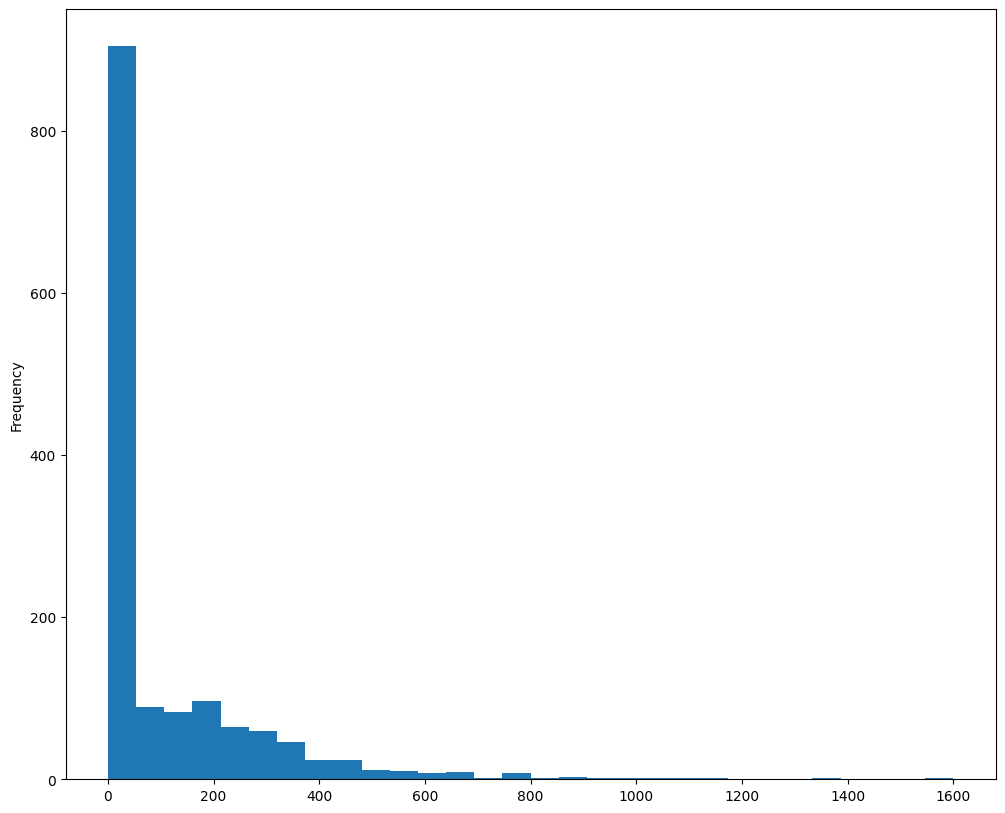

In [ ]:
ds['MasVnrArea'].plot(kind='hist', bins=30)


In [ ]:
ds.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,193784.766473
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,103896.507717
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,20940.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,139060.625000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,170500.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,223625.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,917485.500000


In [ ]:
ds.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].median())


In [ ]:
ds['MasVnrArea']  = ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())
print(ds[continuous].isna().sum().sum())

0


In [ ]:
def pre_processing(ds, todrop, categorical, cat_to_con):
  #dropping
  ds = ds.drop(columns=todrop)

  #categorical
  logical_nans = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', ]
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')
  ds['Electrical'] = ds['Electrical'].fillna(ds['Electrical'].value_counts().index[0])  # mode
  print("no. of nans in categorical cols:", ds[categorical].isna().sum().sum())


  #cat_to_con
  ds['FireplaceQu'] = ds['FireplaceQu'].fillna('NA')
  logical_nans = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')

  ds.drop(columns = ['PoolQC'], inplace=True)
  cat_to_con.remove('PoolQC')
  print("no. of nans in cat_to_con cols:",ds[cat_to_con].isna().sum().sum())

  #target_encoding
  target = 'SalePrice'
  for col in categorical:
      ds[col] = ds.groupby([col])[target].transform('mean')

  #label encoding
  grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
  for col in grp1:
      ds[col] = ds[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})

  for col in ['BsmtFinType1', 'BsmtFinType2']:
      ds[col] = ds[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

  ds['BsmtExposure'] = ds['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
  ds['Functional'] = ds['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0})
  ds['GarageFinish'] = ds['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

  print("total nans in the dataframe:", ds.isna().sum().sum())

  return ds

In [ ]:
ds = pre_processing(ds, todrop, categorical, cat_to_con)


no. of nans in categorical cols: 0
no. of nans in cat_to_con cols: 0
total nans in the dataframe: 0


In [ ]:
ds.columns[ds.isna().sum()>0]


Index([], dtype='object')

In [ ]:
ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,252692.601839,204994.032276,65.0,8450,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,184007.670192,2008,175316.452684,177454.242947,198075.0
1,207766.905970,204994.032276,80.0,9600,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,178829.893617,...,0,0,201832.730831,195275.313691,0,181414.566176,2007,175316.452684,177454.242947,199650.0
2,252692.601839,204994.032276,68.0,11250,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,216298.142857,2008,175316.452684,177454.242947,212325.0
3,174123.741667,204994.032276,60.0,9550,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,193082.861217,...,0,0,201832.730831,195275.313691,0,184007.670192,2006,175316.452684,146527.787129,140000.0
4,252692.601839,204994.032276,84.0,14260,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,178829.893617,...,0,0,201832.730831,195275.313691,0,197798.869492,2008,175316.452684,177454.242947,237500.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)

In [ ]:
ds_scaled

array([[ 1.29689538,  0.35236535, -0.22087509, ..., -0.28525568,
        -0.25468501,  0.04130749],
       [ 0.30782615,  0.35236535,  0.46031974, ..., -0.28525568,
        -0.25468501,  0.056472  ],
       [ 1.29689538,  0.35236535, -0.08463612, ..., -0.28525568,
        -0.25468501,  0.1785102 ],
       ...,
       [-0.43285061,  0.35236535, -0.1754621 , ..., -0.28525568,
        -0.25468501,  0.57182464],
       [ 0.30782615,  0.35236535, -0.08463612, ..., -0.28525568,
        -0.25468501, -0.36055204],
       [ 0.30782615,  0.35236535,  0.23325479, ..., -0.28525568,
        -0.25468501, -0.30362495]])

In [ ]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = LinearRegression()
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))
print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))


6.8968693479424984e+16
11933839364.417614


In [ ]:
y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state= 0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))
print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))

31247.553546371884
0.10183201832527854


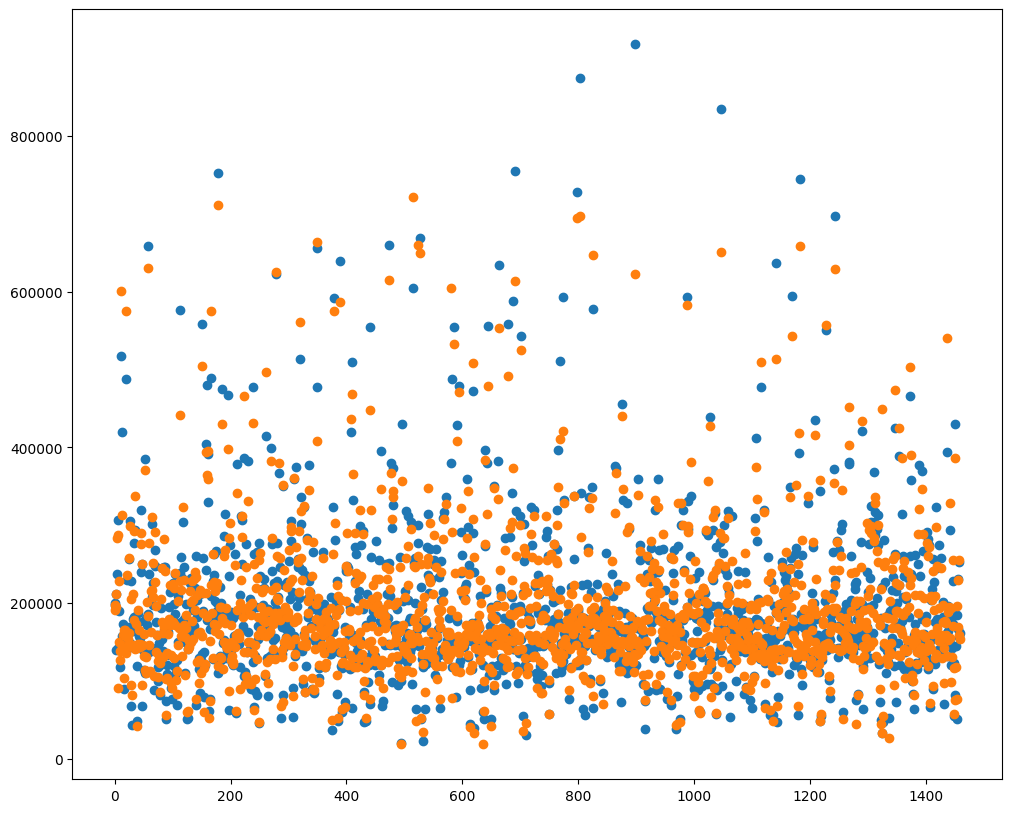

In [ ]:
plt.scatter(range(len(y_true)), y_true)
plt.scatter(range(len(y_true)), y_pred)

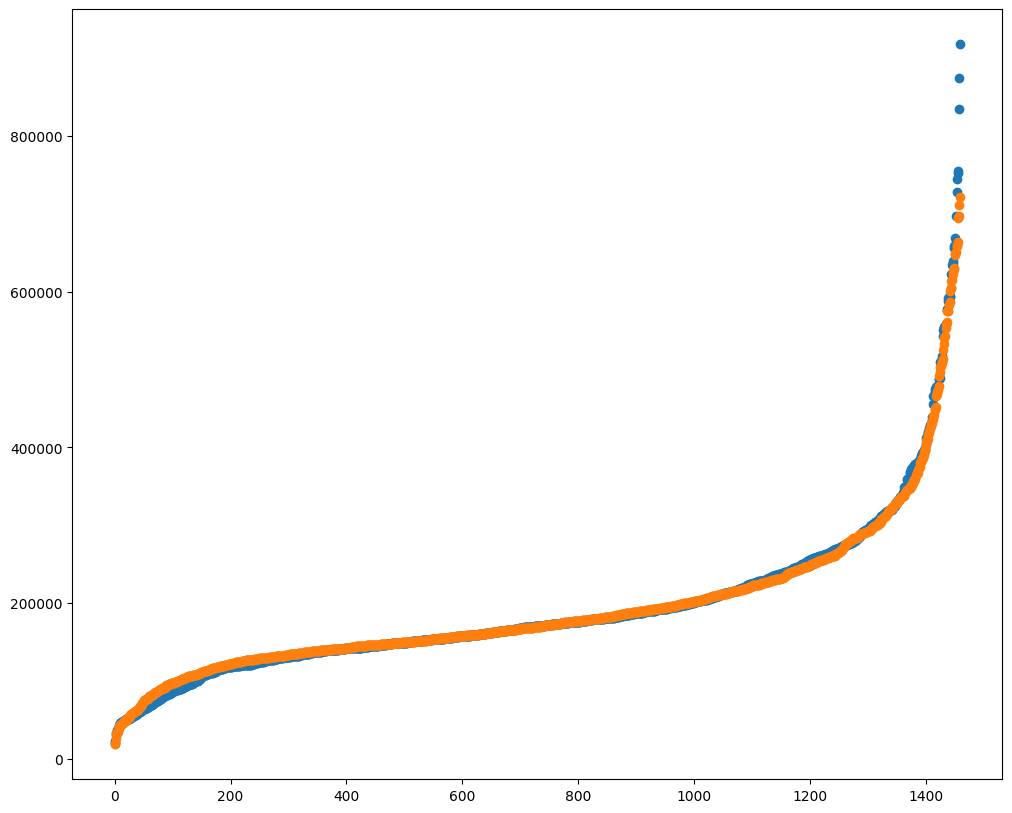

In [ ]:
plt.scatter(range(len(y_true)), sorted(y_true))
plt.scatter(range(len(y_true)), sorted(y_pred))

In [ ]:
from sklearn.decomposition import PCA


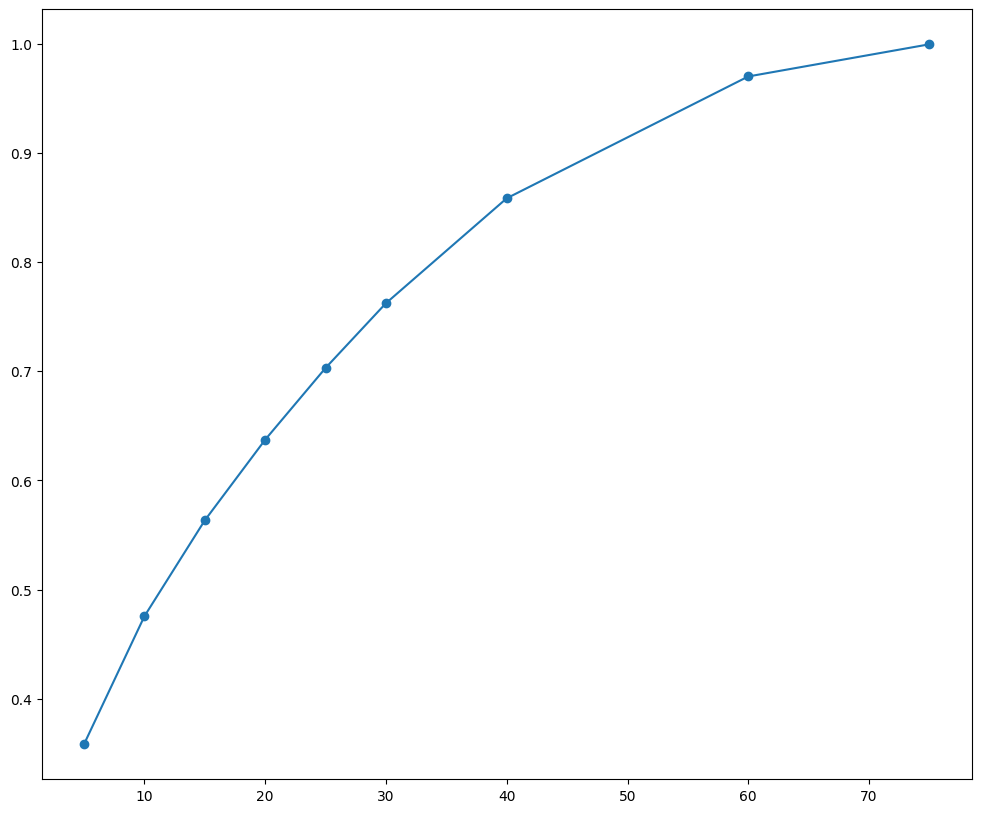

In [ ]:
cs = [5, 10, 15, 20, 25, 30, 40, 60, 75]
info = []
for i in cs:
  pca = PCA(n_components=i)
  pca.fit(ds_scaled[:, :-1])
  info.append(pca.explained_variance_ratio_.sum())

plt.plot(cs, info, '-o')

In [ ]:
pca = PCA(n_components=40)
Xpca = pca.fit_transform(ds_scaled[:, :-1])
y = ds['SalePrice']

In [ ]:
mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = Xpca[train_index], Xpca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)

35906.70238937154


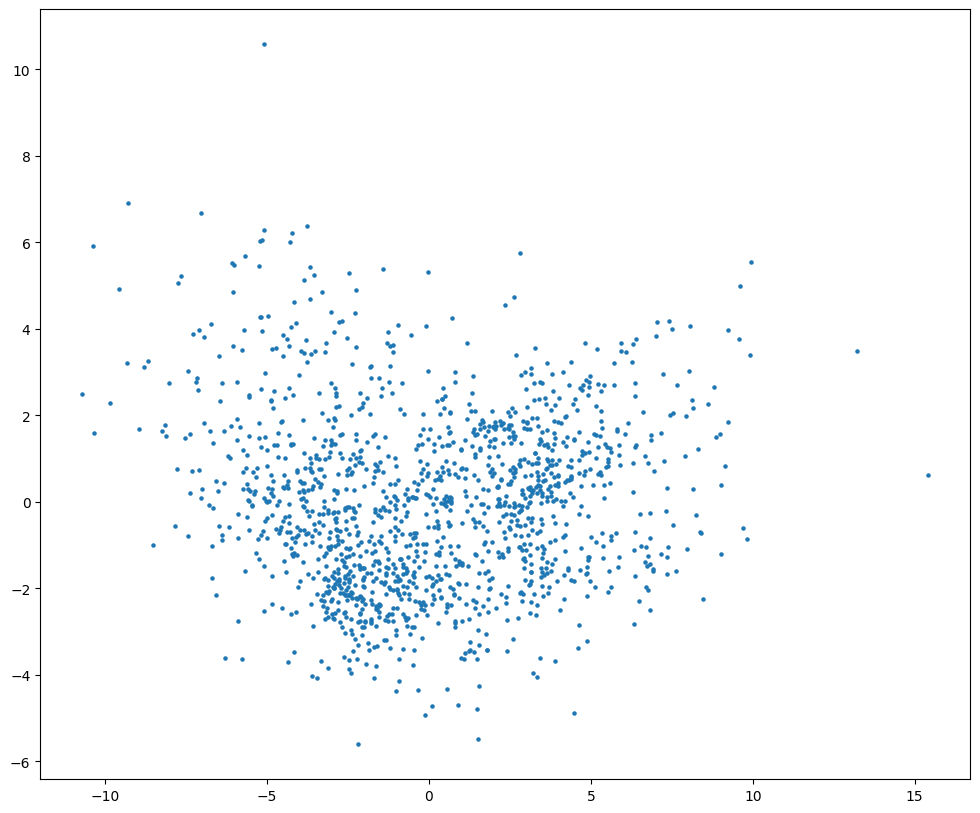

In [ ]:
pca = PCA(n_components=2)
vis = pca.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:, 0], vis[:, 1], s = 5)

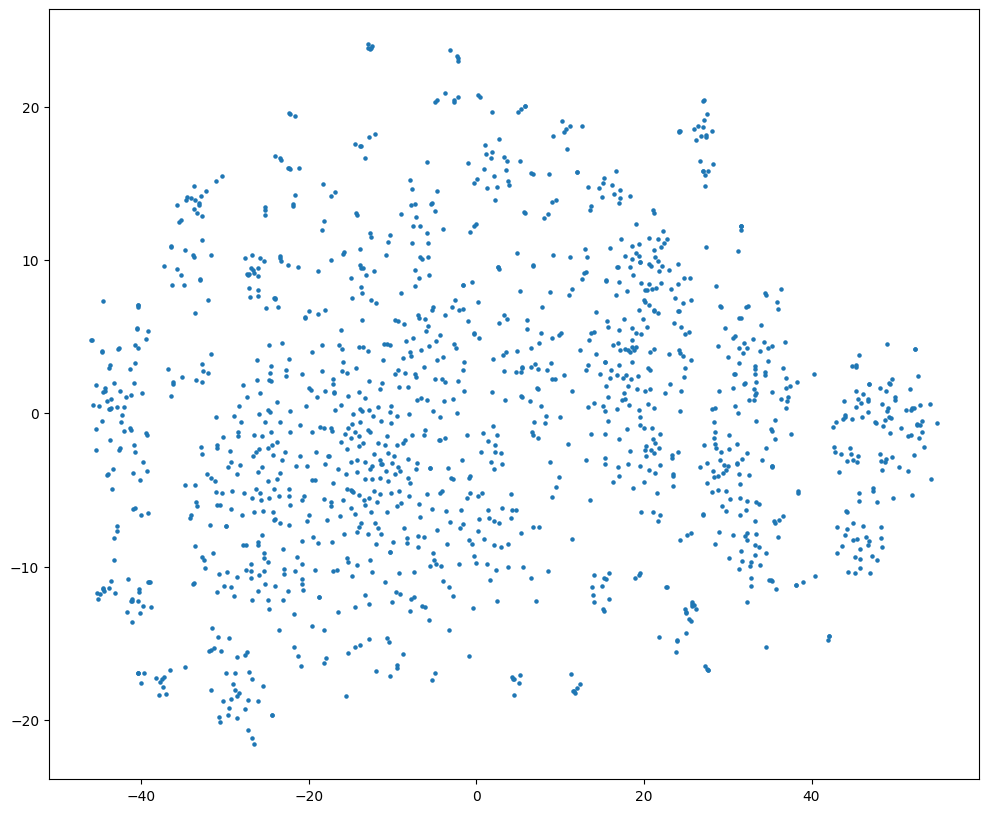

In [ ]:
from sklearn.manifold import TSNE

pca = TSNE(n_components=2, perplexity=50, random_state=0)
vis = pca.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:,0], vis[:,1], s=5)

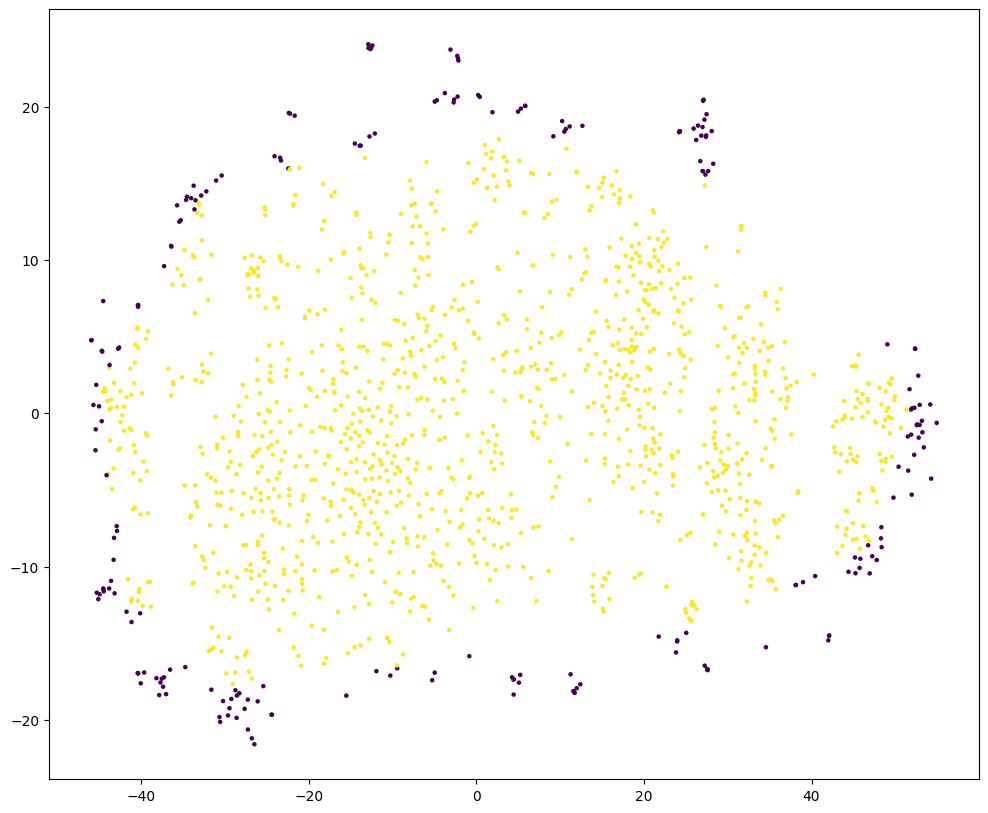

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

is_outlier = IsolationForest(contamination=0.15, random_state=0,
                            n_estimators=1000).fit_predict(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()


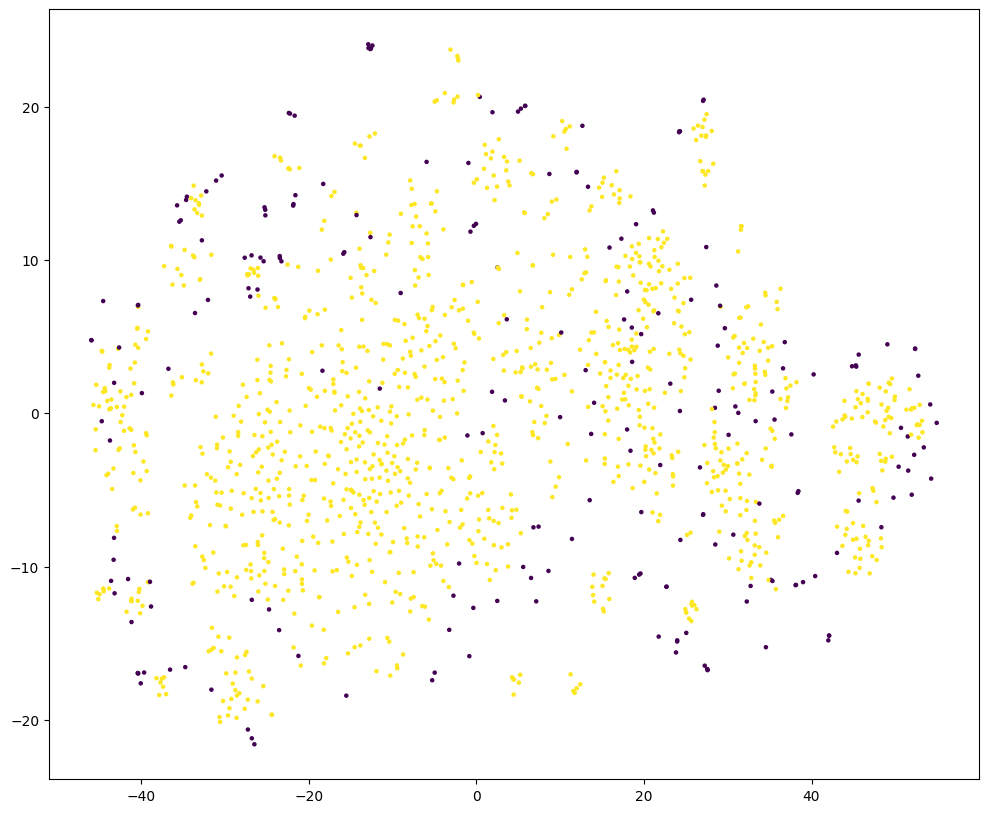

In [ ]:
is_outlier = LocalOutlierFactor(contamination=0.15, n_neighbors=5).fit_predict(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()